In [79]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import os
os.chdir('../')
print(os.getcwd())

/Users


In [6]:
raw_grd_indices = pd.read_csv("Data/training/grd_indices.csv")
raw_grd_data = raw_grd_indices.iloc[:, 1:]
raw_grd_data.head()

,NDVI,GNDVI,AVI,BNDVI,CVI,DVI,DVIplus,ExGR,FCVI,GARI,...,TGI,TRRVI,TVI,TriVI,VARI,VARI700,VI700,VIG,mND705,mSR705
0,0.239575,0.394829,NaN,0.407701,3.258889,9.9765,-2.399951,-13.68170,13.179367,0.492114,...,-141.9245,0.144630,0.859985,413.186,-0.286623,-0.009905,0.092524,-0.171474,0.128388,0.269826
1,0.269978,0.355078,NaN,0.360375,2.537779,8.7445,-1.586315,-7.49678,10.139967,0.667107,...,-64.1015,0.165153,0.877484,443.306,-0.170349,0.065008,0.100022,-0.094123,0.170055,0.239739
2,0.198892,0.294267,NaN,0.304904,2.247387,10.5446,-2.739754,-13.78410,13.282567,0.540784,...,-112.7200,0.147609,0.835998,476.404,-0.180567,0.041694,0.092201,-0.101304,0.133925,0.207331
3,0.203858,0.279593,NaN,0.290261,2.086426,11.4520,-2.835785,-12.92146,13.814267,0.594159,...,-90.1515,0.151501,0.838962,554.124,-0.145834,0.059025,0.091566,-0.080313,0.145703,0.197409
4,0.205305,0.308700,NaN,0.322026,2.362926,9.8383,-2.494809,-12.83943,12.510600,0.526088,...,-105.8160,0.151956,0.839824,438.858,-0.194293,0.032037,0.092289,-0.110391,0.141724,0.221882


In [7]:
robust_scaler = RobustScaler()
robust_scaled_grd = robust_scaler.fit_transform(raw_grd_data)

standard_scaler = StandardScaler()
standard_scaled_grd = standard_scaler.fit_transform(raw_grd_data)

minmax_scaler = MinMaxScaler()
minmax_scaled_grd = minmax_scaler.fit_transform(raw_grd_data)


In [8]:
KNNimputer = KNNImputer()
KNNimputed_robust_grd = KNNimputer.fit_transform(robust_scaled_grd)

simple_imputer = SimpleImputer()
sim_imputed_grd = simple_imputer.fit_transform(raw_grd_data)

In [3]:
grd_speclib = pd.read_csv("Data/C_001_SC3_Cleaned_SpectralLib.csv")
grd_speclib.dropna(subset = ["Functional_group1"], inplace=True)
labels = grd_speclib["Functional_group1"]
labels.head()

/var/folders/6k/89y9bz292sq80h1z4zxk39kh0000gn/T/ipykernel_49299/2509639228.py:1: DtypeWarning: Columns (2162,2163,2164,2166,2167,2168,2174,2175,2176,2177,2181,2182,2183) have mixed types. Specify dtype option on import or set low_memory=False.
  grd_speclib = pd.read_csv("Data/C_001_SC3_Cleaned_SpectralLib.csv")


0    Lichen
1    Lichen
2    Lichen
3    Lichen
4    Lichen
Name: Functional_group1, dtype: object

In [69]:
x_train, x_test, y_train, y_test = train_test_split(labels, KNNimputed_robust_grd, train_size = 0.8)

In [70]:
rf = RandomForestClassifier()
rf.fit(y_train, x_train)

RandomForestClassifier()

In [71]:
predicted = rf.predict(y_test)

0.7787531062062056
0.6531226157763887


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (1343).

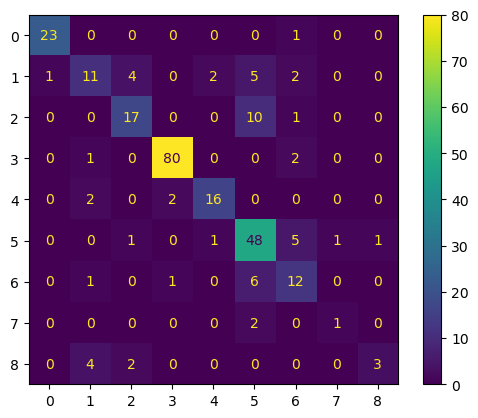

In [83]:
print(f1_score(x_test, predicted, average="weighted"))
print(balanced_accuracy_score(x_test, predicted))
cm = confusion_matrix(x_test,predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()